<a href="https://colab.research.google.com/github/Jonesy639/Athletic_Clothing_Segmentation/blob/main/Athletic_Clothing_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Athletic Clothing Industry**

Market Segmentation

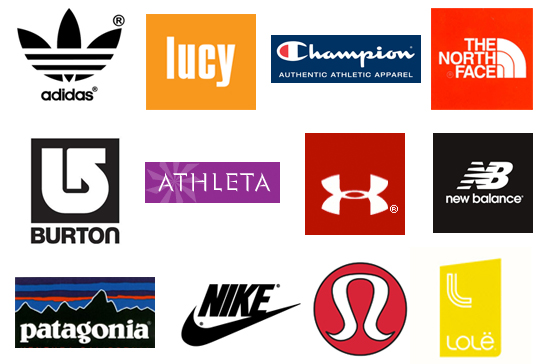

This notebook contains the segmentation analysis of consumers in the athletic clothing industry based on behavioral variables. 

The notebook references primary research data collected through depth interviews and survery distribution to Facebook groups, group chats, and shared with friends and family. The nature of which the survey was shared ensured the randomness of the sample accumulated. Our survery focuses on providing a deep understanding of the motivations that lead customers to finalize their purchases of athletic clothing. Through the use of **Hierarchical Clustering**, specifically the Ward Linkage Method, three unique market segments were discovered from this analysis.

**Hierarchical Clustering**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

S = pd.read_csv("/content/724_Cleaned_Project_Data.csv", usecols=['ID','Comfort','Performance','Price','Brand',
                                                                  'Style','Sustainability','Durability'])

S = S.set_index('ID')
X = S.copy()
X = (X - X.mean()) / X.std()
X.head()

X = (X - X.mean()) / X.std()
X.head()

N, P = X.shape

from scipy.cluster.hierarchy import linkage, dendrogram
numpy_Z = linkage(X)

Z = pd.DataFrame(
    numpy_Z,
    columns=['cluster_A', 'cluster_B', 'distance', 'size_new_cluster']
)

Z['cluster_A'] = Z['cluster_A'].astype(int)
Z['cluster_B'] = Z['cluster_B'].astype(int)
Z['size_new_cluster'] = Z['size_new_cluster'].astype(int)

assert Z.shape[0] == (N - 1)

Z['cluster_number'] = N + np.arange(N - 1)

Z.head()

,cluster_A,cluster_B,distance,size_new_cluster,cluster_number
0,95,111,0.0,2,149
1,30,49,0.0,2,150
2,81,116,0.0,2,151
3,67,123,0.0,2,152
4,2,104,0.0,2,153


**Dendrogram**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


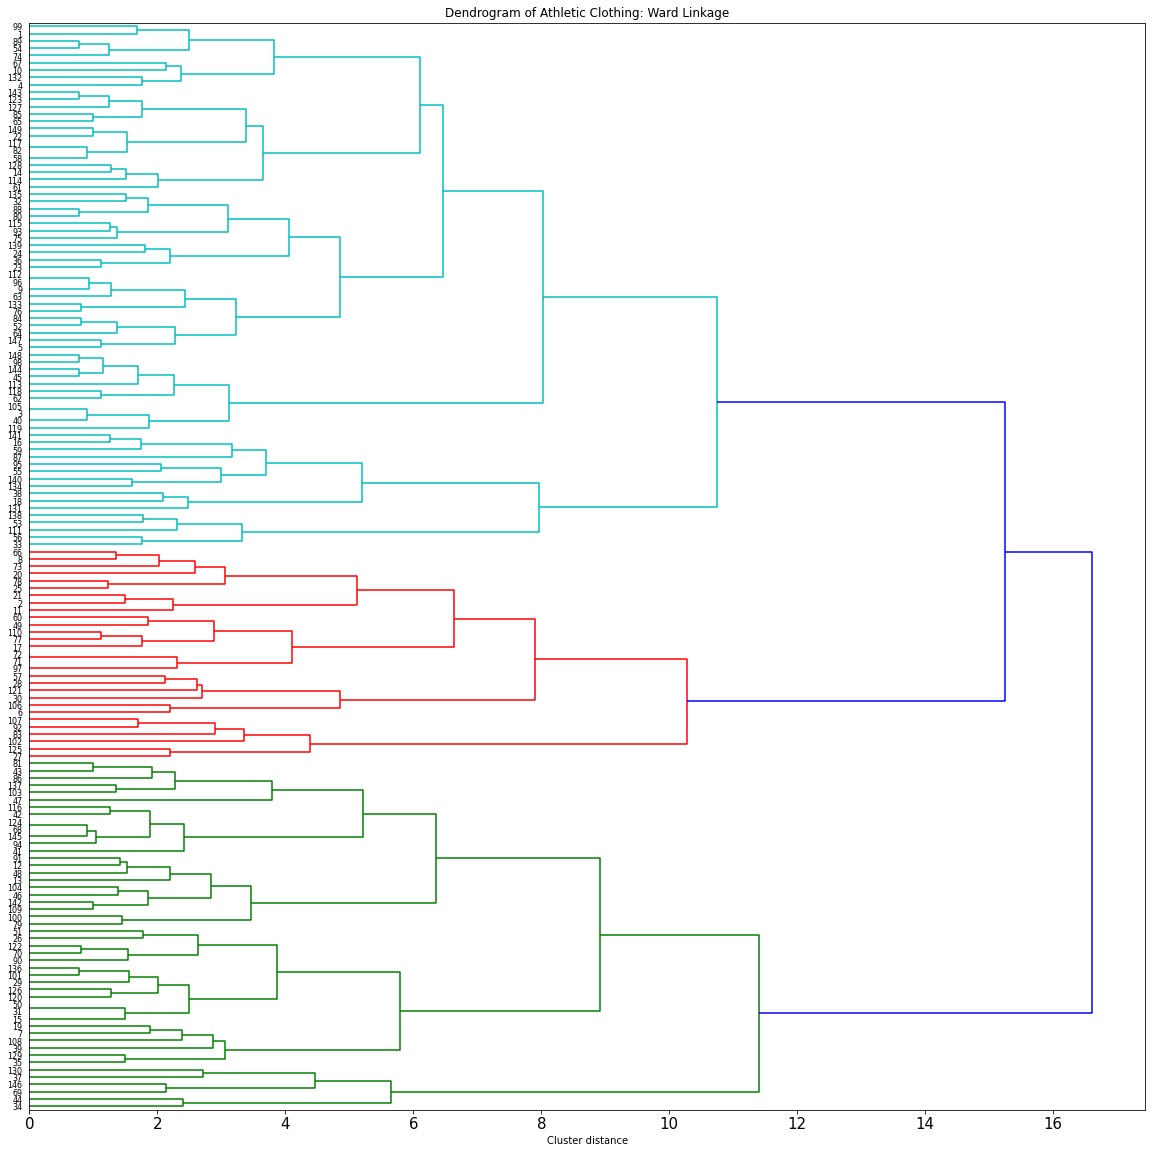

In [ ]:
# initialize a new figure
fig = plt.figure(figsize=(20,20))

import matplotlib as mpl
mpl.use('Agg')

ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=8)

#dendrogram
dn = dendrogram(
    linkage(X, method='ward'), # change this from 'single' to 'ward'
    orientation='right',
    labels=X.index,
    ax=ax
)

ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=8)

#title and x-axis label
plt.title('Dendrogram of Athletic Clothing: Ward Linkage')
plt.xlabel('Cluster distance')

# show the figure
plt.show()

**Analysis of Segments**

*Segment 1: Active Lifestyle*

In [ ]:
C1= S.loc[[99,1,89,54,74,67,10,132,4,143,123,127,85,65,149,22,117,
           82,58,128,14,114,61,135,32,88,80,115,93,75,139,24,36,
           23,112,96,9,63,133,76,84,52,64,147,5,148,98,144,45,113,
           118,62,105,3,40,119,141,16,59,87,95,55,140,134,38,18,131,138,53,
            111,56,33]]
C1.head()

,Comfort,Performance,Price,Brand,Style,Sustainability,Durability
ID,,,,,,,
99,4,4,5,5,5,4,4
1,4,4,4,4,5,4,5
89,4,4,4,4,4,4,4
54,4,4,4,3,4,4,4
74,4,3,4,4,4,4,4


In [ ]:
print(C1['Comfort'].mean())
print(C1['Performance'].mean())
print(C1['Price'].mean())
print(C1['Brand'].mean())
print(C1['Style'].mean())
print(C1['Sustainability'].mean())
print(C1['Durability'].mean())

4.763888888888889
4.194444444444445
3.8194444444444446
3.7083333333333335
4.416666666666667
3.611111111111111
4.444444444444445


*Segment 2: Fashionable People*

In [ ]:
C2= S.loc[[66,8,73,20,78,25,21,2,11,60,49,110,77,17,72,71,97,57,
           28,121,30,106,6,107,92,83,102,125,27]]
C2.head()

,Comfort,Performance,Price,Brand,Style,Sustainability,Durability
ID,,,,,,,
66,4,3,5,4,5,1,2
8,4,3,5,5,5,1,3
73,4,3,5,4,5,3,3
20,3,3,5,3,5,1,2
78,4,3,5,4,4,1,4


In [ ]:
print(C2['Comfort'].mean())
print(C2['Performance'].mean())
print(C2['Price'].mean())
print(C2['Brand'].mean())
print(C2['Style'].mean())
print(C2['Sustainability'].mean())
print(C2['Durability'].mean())

4.068965517241379
3.4482758620689653
4.0
3.4482758620689653
4.586206896551724
2.3793103448275863
2.9655172413793105


*Segment 3: Comfort Seekers*

In [ ]:
C3= S.loc[[81,43,86,137,103,47,116,42,124,68,145,94,41,91,12,48,13,104,
           46,142,109,100,79,51,26,122,70,90,136,101,29,126,120,50,31,
           15,19,7,108,39,129,35, 130,37,146,69,44,34]]
C3.head()

,Comfort,Performance,Price,Brand,Style,Sustainability,Durability
ID,,,,,,,
81,5,5,4,1,4,3,5
43,5,4,4,1,4,3,5
86,5,5,3,1,5,3,5
137,5,4,3,1,4,4,5
103,5,4,3,2,4,4,4


In [ ]:
print(C3['Comfort'].mean())
print(C3['Performance'].mean())
print(C3['Price'].mean())
print(C3['Brand'].mean())
print(C3['Style'].mean())
print(C3['Sustainability'].mean())
print(C3['Durability'].mean())

4.8125
3.4791666666666665
4.3125
1.6875
3.6041666666666665
3.5208333333333335
4.416666666666667


*Segment 4*

In [ ]:
C4= S.loc[[130,37,146,69,44,34]]
C4.head()

,Comfort,Performance,Price,Brand,Style,Sustainability,Durability
ID,,,,,,,
130,5,2,4,1,2,3,4
37,5,1,5,1,1,1,5
146,5,4,4,1,2,1,4
69,5,4,2,2,2,1,4
44,3,1,5,1,2,2,3


In [ ]:
print(C4['Comfort'].mean())
print(C4['Performance'].mean())
print(C4['Price'].mean())
print(C4['Brand'].mean())
print(C4['Style'].mean())
print(C4['Sustainability'].mean())
print(C4['Durability'].mean())

4.5
2.3333333333333335
4.0
1.1666666666666667
1.8333333333333333
1.6666666666666667
3.6666666666666665
